# Análise de Filmes exibidos no Brasil de 2009 até 2018
* Com base nos dados da ANCINE (https://oca.acine.gov.br)

Arquivo 2120.xlsx


#### Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Configurado o matplotlib
%matplotlib inline

#### Criando o DATAFRAME com base no arquivo excel

In [2]:
# precisamos pular as 2 primeiras linhas (skiprows)
df = pd.read_csv('2120.csv', sep=';', encoding='latin1', header=2, thousands='.', decimal=',')
# Exibindo as cinco primeiras linhas
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2009,"""2012""",E1600546500000,Ficção,Estados Unidos,Estrangeira,13/11/2009,Sony,Distribuição Internacional,5056558.0,42950999.00
1,2009,"""007 Quantum of Solace""",E1402431200000,Ficção,"Estados Unidos, Inglaterra",Estrangeira,07/11/2008,Sony,Distribuição Internacional,8672.0,44151.00
2,2009,"""1983.. O Ano Azul""",B0901024500000,Documentário,Brasil,Brasileira,05/06/2009,Prana Filmes,Distribuição Nacional,2313.0,23001.98
3,2009,"""2 Filhos de Francisco: A História de Zezé Di ...",B0500302600000,Ficção,Brasil,Brasileira,19/08/2005,Sony,Distribuição Internacional,75.0,225.00
4,2009,"""23 Anos em 7 Segundos: 1977 - O Fim do Jejum ...",B0901028800000,Documentário,Brasil,Brasileira,26/06/2009,Fox,Distribuição Internacional,1718.0,14936.00


#### Verificar todos os tipos das colunas 

In [3]:
df.dtypes

Ano de exibição                     object
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição         float64
Renda (R$) no ano de exibição      float64
dtype: object

In [4]:
# Verificando dados nulos
df.isnull().sum()

Ano de exibição                     3
Título da obra                     16
CPB/ROE                            16
Gênero                             16
País(es) produtor(es) da obra      16
Nacionalidade da obra              16
Data de lançamento                 16
Distribuidora                      16
Origem da empresa distribuidora    16
Público no ano de exibição         16
Renda (R$) no ano de exibição      16
dtype: int64

In [5]:
#Apagando dados faltantes da coluna Renda
df.dropna(inplace=True)
df.isnull().sum()

Ano de exibição                    0
Título da obra                     0
CPB/ROE                            0
Gênero                             0
País(es) produtor(es) da obra      0
Nacionalidade da obra              0
Data de lançamento                 0
Distribuidora                      0
Origem da empresa distribuidora    0
Público no ano de exibição         0
Renda (R$) no ano de exibição      0
dtype: int64

#### Vendo os 5 filmes de menor bilheteria


In [6]:
df.nsmallest(5,'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
100,2009,"""As Chaves de Casa""",E1600598400000,Ficção,Itália,Estrangeira,06/01/2006,Filmes do Estação,Distribuição Nacional,0.0,0.0
360,2009,"""Naufrágio - Mistério e Morte na Catástrofe do...",B1101495000000,Documentário,Brasil,Brasileira,25/12/2009,Master Shot Produções,Distribuição Nacional,0.0,0.0
488,2009,"""Santiago""",B0700739200000,Documentário,Brasil,Brasileira,24/08/2007,Videofilmes,Distribuição Nacional,0.0,0.0
563,2009,"""Vamos Subir, Leão""",Sem CPB,Documentário,Brasil,Brasileira,20/03/2009,Canal 3,Distribuição Nacional,0.0,0.0
727,2010,"""Cine Cocoricó: As Aventuras na Cidade""",B0901055900000,Ficção,Brasil,Brasileira,17/07/2009,Moviemobz,Distribuição Nacional,1.0,0.0


#### Vendo os 5 filmes de maior bilheteria

In [7]:
df.nlargest(10,'Renda (R$) no ano de exibição').round()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5848,2018,"""Vingadores: Guerra Infinita""",E1800067100000,Ficção,Estados Unidos,Estrangeira,26/04/2018,Disney,Distribuição Internacional,14501280.0,238020232.0
4206,2015,"""Vingadores: A Era de Ultron""",E1500563200000,Ficção,Estados Unidos,Estrangeira,23/04/2015,Disney,Distribuição Internacional,10129071.0,146184931.0
5840,2018,"""Os Incríveis 2""",E1800037700000,Animação,Estados Unidos,Estrangeira,28/06/2018,Disney,Distribuição Internacional,9809291.0,145011793.0
4411,2016,"""Capitão América: Guerra civil""",E1600129800000,Ficção,Estados Unidos,Estrangeira,28/04/2016,Disney,Distribuição Internacional,9617572.0,143337020.0
4199,2015,"""Velozes e Furiosos 7""",E1500161300000,Ficção,Estados Unidos,Estrangeira,02/04/2015,Universal,Distribuição Internacional,9857946.0,142465883.0
5670,2017,"""Velozes e Furiosos 8""",E1700045600000,Ficção,Estados Unidos,Estrangeira,13/04/2017,Universal,Distribuição Internacional,8505215.0,133423662.0
5352,2017,"""Liga da Justiça""",E1700482600000,Ficção,Estados Unidos,Estrangeira,15/11/2017,Warner,Distribuição Internacional,8442364.0,132575577.0
4368,2016,"""Batman vs Superman: A Origem da Justiça""",E1600053700000,Ficção,Estados Unidos,Estrangeira,24/03/2016,Warner,Distribuição Internacional,8565380.0,132441028.0
5000,2017,"""A Bela e a Fera (2017)""",E1600795300000,Ficção,Estados Unidos,Estrangeira,16/03/2017,Disney,Distribuição Internacional,8308489.0,130084653.0
2047,2012,"""Os Vingadores - The Avengers""",E1500275200000,Ficção,Estados Unidos,Estrangeira,27/04/2012,Disney,Distribuição Internacional,10911371.0,129595590.0


In [8]:
# Identificando o problema da coluna lançamentos
df['Data de lançamento'].value_counts()

Relançamento    175
21/12/2012       33
03/12/2015       33
29/11/2013       29
02/11/2012       27
               ... 
13/11/2018        1
07/06/2008        1
13/08/2011        1
31/01/2009        1
18/05/2007        1
Name: Data de lançamento, Length: 821, dtype: int64

In [9]:
# Exibir alguns filmes que estão como relançamento
df[df['Data de lançamento'] == 'Relançamento'].head(10)

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
10,2009,"""A agenda""",E1600634500000,Ficção,França,Estrangeira,Relançamento,Imovision,Distribuição Nacional,33.0,154.50
248,2009,"""Fome de Viver""",E1600228600000,Ficção,Reino Unido,Estrangeira,Relançamento,Filmes do Estação,Distribuição Nacional,268.0,944.00
426,2009,"""Os Contos de Canterbury""",E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora,Distribuição Nacional,5026.0,29614.00
474,2009,"""Ratatouille""",E1500365600000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,230.0,2300.00
506,2009,"""Sofá Cama""",E1600624100000,Ficção,Argentina,Estrangeira,Relançamento,Panda Filmes,Distribuição Nacional,579.0,3529.60
948,2010,"""Os Contos de Canterbury""",E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora,Distribuição Nacional,54.0,260.00
1046,2010,"""Toy story 2""",E1402545000000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,162034.0,2225107.75
1048,2010,"""Toy story 3D""",E1402544900000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,96973.0,1308293.25
1331,2011,"""Ginger e Fred""",E1500789200000,Ficção,"Alemanha, França, Itália",Estrangeira,Relançamento,F.J. Vídeo,Distribuição Nacional,106.0,217.00
1480,2011,"""O Rei Leão 3D""",E1600217900000,Animação,Estados Unidos,Estrangeira,Relançamento,Disney,Distribuição Internacional,304367.0,4069169.50


## Decisão sobre dados incorretos/faltantes/divergentes

In [10]:
df.shape

(6398, 11)

### Criando um novo dataframe sem os relaçamentos

In [11]:
df_lancamento = df[df['Data de lançamento'] != 'Relançamento'].copy()

In [12]:
# Verificando os tipos de colunas
df_lancamento.dtypes

Ano de exibição                     object
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição         float64
Renda (R$) no ano de exibição      float64
dtype: object

In [13]:
# Converter o campo data de lançamento em data
# Converter a coluna Data de lançamento para datetime
df_lancamento['Data de lançamento'] = pd.to_datetime(df_lancamento['Data de lançamento'])

In [14]:
df_lancamento.dtypes

Ano de exibição                            object
Título da obra                             object
CPB/ROE                                    object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                float64
Renda (R$) no ano de exibição             float64
dtype: object

In [15]:
# Quais os anos tiveram mais filmes lançados?
df_lancamento['Data de lançamento'].dt.year.value_counts()

2013    673
2017    664
2015    660
2016    634
2014    625
2011    553
2012    541
2009    504
2018    492
2010    476
2008    225
2007     61
2006     49
2005     29
2004     10
2002      6
2001      5
2003      4
1999      3
2019      3
2000      2
2020      1
1978      1
1987      1
1998      1
Name: Data de lançamento, dtype: int64

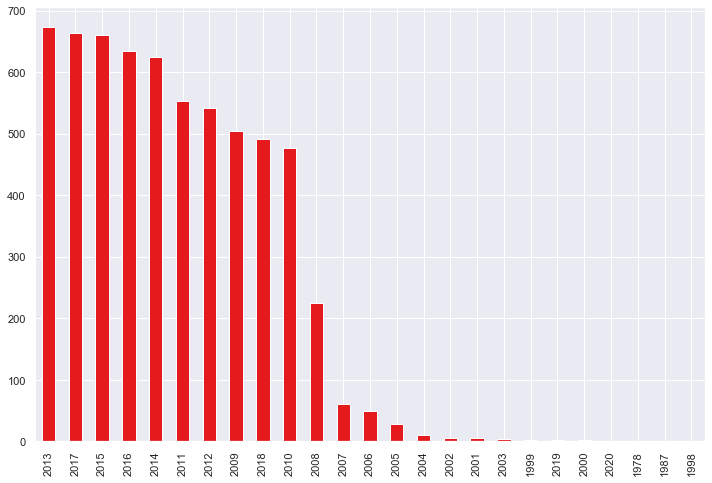

In [16]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid", palette='Set1')
df_lancamento['Data de lançamento'].dt.year.value_counts().plot.bar()

In [17]:
df_lancamento['Ano'] = (df_lancamento['Data de lançamento'].dt.year)

In [18]:
df_lancamento.Ano

0       2009
1       2008
2       2009
3       2005
4       2009
        ... 
6393    2018
6394    2018
6395    2018
6396    2018
6397    2018
Name: Ano, Length: 6223, dtype: int64

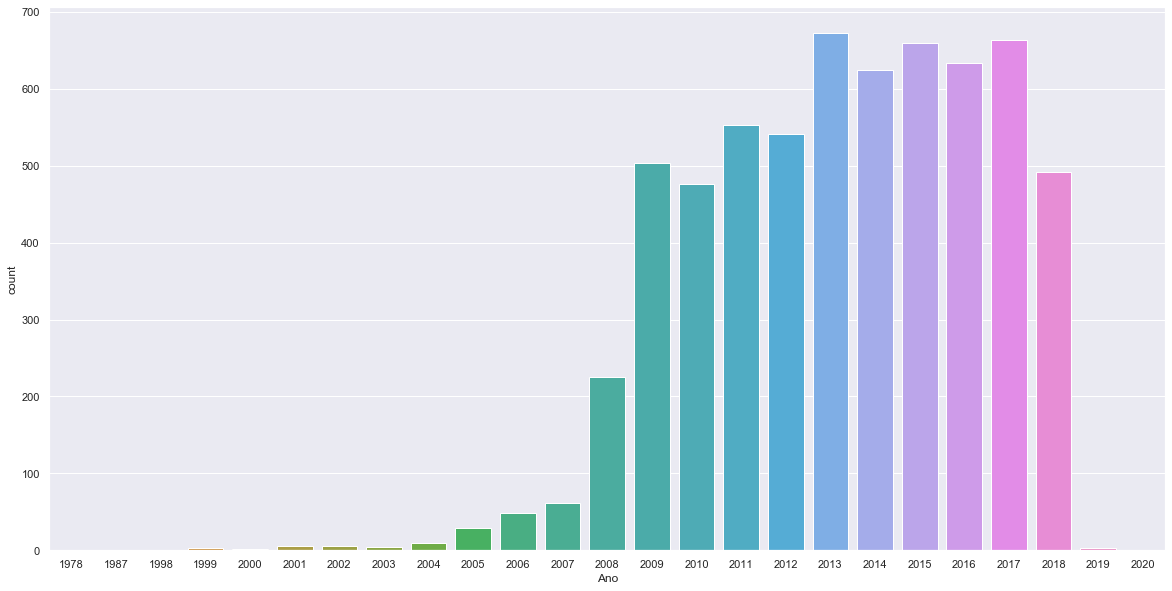

In [19]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid", palette='Set1')
ax = sns.countplot(df_lancamento['Ano'], data=df_lancamento)

In [20]:
df_lancamento[df_lancamento['Ano'] == 2019]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,Ano
5811,2018,"""Lizzie""",E1800466600000,Ficção,Estados Unidos,Estrangeira,2019-03-01,Diamond Films Do Brasil,Distribuição Nacional,33.0,580.0,2019
6101,2018,"""Meu Querido Filho""",E1800547800000,Ficção,"Bélgica, França, Qatar, Tunísia",Estrangeira,2019-03-01,Pandora,Distribuição Nacional,105.0,788.0,2019
6328,2018,"""Temporada""",B1800466100000,Ficção,Brasil,Brasileira,2019-01-17,Vitrine Filmes,Distribuição Nacional,47.0,476.0,2019


In [21]:
df_lancamento[df_lancamento['Ano'] == 2020]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,Ano
6334,2018,"""Vermelho Sol""",B1800458600000,Ficção,"Brasil, Argentina, França",Brasileira,2020-12-12,Vitrine Filmes,Distribuição Nacional,217.0,2228.0,2020


* É presumido que esses 4 filmes tinham datas de estreia de lançamento em 2019 e 2020, por isso entrou nos dados da nossa análise. 

In [22]:
# Quantos filmes são nacionais e quanto são estrangeiros?
df_lancamento['Nacionalidade da obra'].value_counts()

Estrangeira    4356
Brasileira     1867
Name: Nacionalidade da obra, dtype: int64

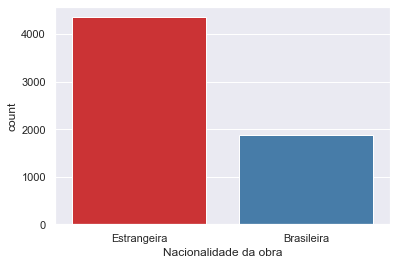

In [23]:
ax = sns.countplot(x="Nacionalidade da obra", data=df_lancamento)

#### Escolhendo remover os dados de estreia 2019, 2020 e anteriores a 2009

In [24]:
df_lancamento['Ano'] = df_lancamento[df_lancamento['Ano'] < 2019]

### Exibindo o gráfico dos filmes lançados de 2009 até 2018

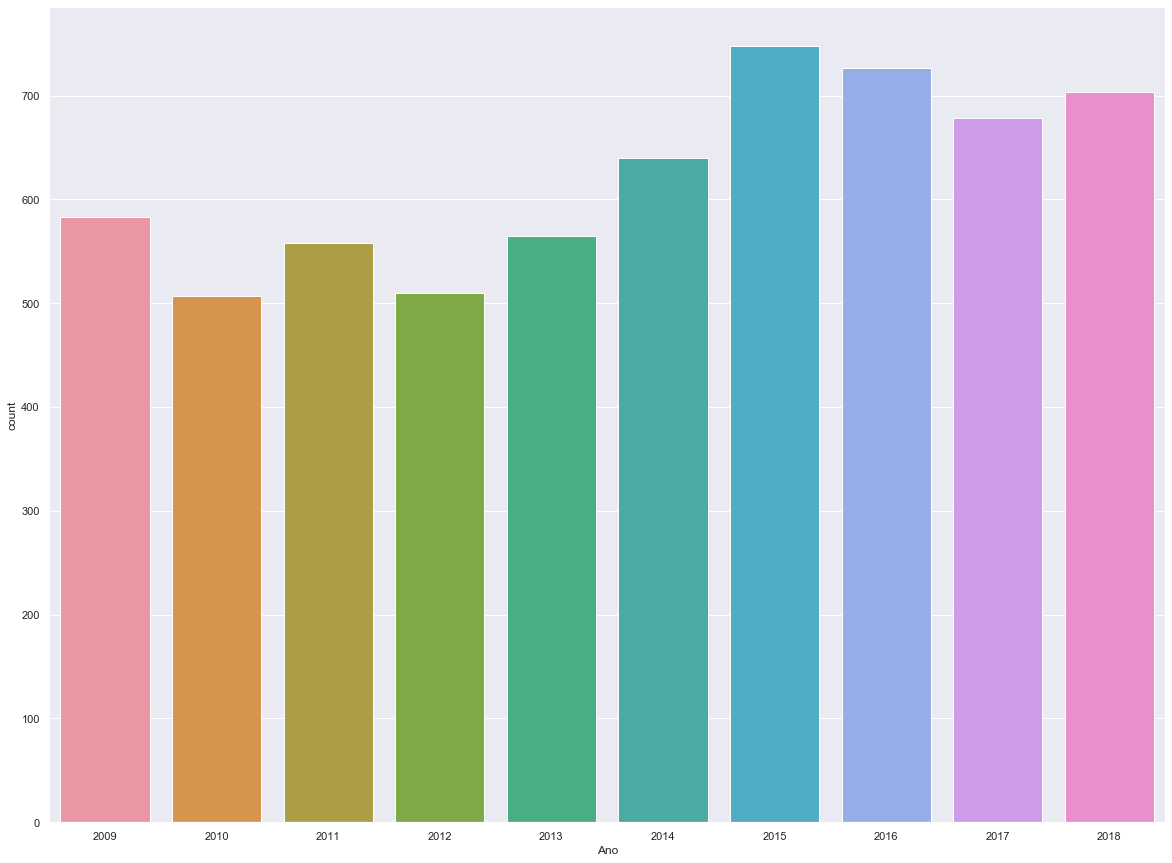

In [25]:
plt.figure(figsize=(20,15))
sns.set(style="darkgrid", palette='Set1')
ax = sns.countplot(df_lancamento['Ano'], data=df_lancamento)

## Exibindo os filmes Brasileiros de maior bilheteria

In [26]:
# Exibindo os filmes de nacionalidade brasileira
df_lancamento[df_lancamento['Nacionalidade da obra'] == 'Brasileira'].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,Ano
2,2009,"""1983.. O Ano Azul""",B0901024500000,Documentário,Brasil,Brasileira,2009-05-06,Prana Filmes,Distribuição Nacional,2313.0,23001.98,2009
3,2009,"""2 Filhos de Francisco: A História de Zezé Di ...",B0500302600000,Ficção,Brasil,Brasileira,2005-08-19,Sony,Distribuição Internacional,75.0,225.00,2009
4,2009,"""23 Anos em 7 Segundos: 1977 - O Fim do Jejum ...",B0901028800000,Documentário,Brasil,Brasileira,2009-06-26,Fox,Distribuição Internacional,1718.0,14936.00,2009
7,2009,"""5 Frações de uma Quase História""",B0700678800000,Ficção,Brasil,Brasileira,2008-09-05,Usina Digital,Distribuição Nacional,518.0,2367.50,2009
14,2009,"""A Casa de Alice""",B0700722200000,Ficção,Brasil,Brasileira,2007-11-15,Imovision,Distribuição Nacional,24.0,279.00,2009


In [27]:
# Criando um dataframe com os filmes brasileiros
df_brasileiro = df_lancamento[df_lancamento['Nacionalidade da obra'] == 'Brasileira']

In [28]:
df_brasileiro.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,Ano
2,2009,"""1983.. O Ano Azul""",B0901024500000,Documentário,Brasil,Brasileira,2009-05-06,Prana Filmes,Distribuição Nacional,2313.0,23001.98,2009
3,2009,"""2 Filhos de Francisco: A História de Zezé Di ...",B0500302600000,Ficção,Brasil,Brasileira,2005-08-19,Sony,Distribuição Internacional,75.0,225.00,2009
4,2009,"""23 Anos em 7 Segundos: 1977 - O Fim do Jejum ...",B0901028800000,Documentário,Brasil,Brasileira,2009-06-26,Fox,Distribuição Internacional,1718.0,14936.00,2009
7,2009,"""5 Frações de uma Quase História""",B0700678800000,Ficção,Brasil,Brasileira,2008-09-05,Usina Digital,Distribuição Nacional,518.0,2367.50,2009
14,2009,"""A Casa de Alice""",B0700722200000,Ficção,Brasil,Brasileira,2007-11-15,Imovision,Distribuição Nacional,24.0,279.00,2009


### Exibindo os filmes brasileiros de maior bilheteria

In [29]:
# Somente os 10 primeiros
df_brasileiro.nlargest(10, 'Renda (R$) no ano de exibição').round()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,Ano
6151,2018,"""Nada A Perder""",B1800110100000,Ficção,Brasil,Brasileira,2018-03-29,Downtown/Paris,Distribuição Nacional,12184373.0,120992794.0,2018
4793,2016,"""Os Dez Mandamentos - O Filme""",B1600036400000,Ficção,Brasil,Brasileira,2016-01-28,Downtown/Paris,Distribuição Nacional,11305479.0,116833027.0,2016
1051,2010,"""Tropa de elite 2""",B1001296000000,Ficção,Brasil,Brasileira,2010-08-10,Zazen,Distribuição Nacional,11023475.0,102320114.0,2010
5394,2017,"""Minha mãe é uma peça 2""",B1600716500000,Ficção,Brasil,Brasileira,2016-12-22,Downtown/Paris,Distribuição Nacional,5213465.0,73713231.0,2017
4641,2016,"""Minha mãe é uma peça 2""",B1600716500000,Ficção,Brasil,Brasileira,2016-12-22,Downtown/Paris,Distribuição Nacional,4020898.0,50967947.0,2016
2495,2013,"""Minha mãe é uma peça""",B1301808100000,Ficção,Brasil,Brasileira,2013-06-21,Downtown/Paris,Distribuição Nacional,4600145.0,49533218.0,2013
490,2009,"""Se Eu Fosse Você 2""",B0800958700000,Ficção,Brasil,Brasileira,2009-02-01,Fox,Distribuição Internacional,5786844.0,47622137.0,2009
3818,2015,"""Loucas pra Casar""",B1402704900000,Ficção,Brasil,Brasileira,2015-08-01,Downtown/Paris,Distribuição Nacional,3726547.0,45688070.0,2015
4195,2015,"""Vai que Cola - O Filme""",B1500654500000,Ficção,Brasil,Brasileira,2015-01-10,H2O Films,Distribuição Nacional,3307837.0,41803908.0,2015
2347,2013,"""De pernas pro ar 2""",B1201676800000,Ficção,Brasil,Brasileira,2012-12-28,Downtown/Paris/RioFilme,Distribuição Nacional,3787852.0,39375394.0,2013


### Exibindo os filmes brasileiros de menor bilheteria

In [30]:
# Somente os 10 últimos
df_brasileiro.nsmallest(10, 'Renda (R$) no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,Ano
360,2009,"""Naufrágio - Mistério e Morte na Catástrofe do...",B1101495000000,Documentário,Brasil,Brasileira,2009-12-25,Master Shot Produções,Distribuição Nacional,0.0,0.0,2009
488,2009,"""Santiago""",B0700739200000,Documentário,Brasil,Brasileira,2007-08-24,Videofilmes,Distribuição Nacional,0.0,0.0,2009
563,2009,"""Vamos Subir, Leão""",Sem CPB,Documentário,Brasil,Brasileira,2009-03-20,Canal 3,Distribuição Nacional,0.0,0.0,2009
727,2010,"""Cine Cocoricó: As Aventuras na Cidade""",B0901055900000,Ficção,Brasil,Brasileira,2009-07-17,Moviemobz,Distribuição Nacional,1.0,0.0,2010
848,2010,"""Luto Como Mãe""",B1101395900000,Documentário,Brasil,Brasileira,2010-08-20,TV Zero Cinema,Distribuição Nacional,0.0,0.0,2010
1017,2010,"""Simonal - Ninguém Sabe o Duro que Dei""",B0901010000000,Documentário,Brasil,Brasileira,2009-05-15,Moviemobz/RioFilme,Distribuição Nacional,1.0,0.0,2010
1152,2011,"""A Última Estrada da Praia""",B11013835,Ficção,Brasil,Brasileira,2011-09-16,Okna Produções,Distribuição Nacional,0.0,0.0,2011
1533,2011,"""Porta a porta  A política em dois tempos""",B1101435200000,Documentário,Brasil,Brasileira,2011-02-12,Zéfiro Produções,Distribuição Nacional,0.0,0.0,2011
1654,2011,"""Walachai""",B1001193200000,Documentário,Brasil,Brasileira,2011-11-18,Ciclorama,Distribuição Nacional,0.0,0.0,2011
1811,2012,"""Clementina de Jesus - Rainha Quelé""",B12016413,Documentário,Brasil,Brasileira,2012-11-15,Werinton Kermes Telles Marsal,Distribuição Nacional,0.0,0.0,2012


### Plotando quantidade de filmes brasileiros lançados

In [31]:
df_brasileiro['Ano'].value_counts()

2018    251
2017    225
2016    217
2015    214
2014    178
2009    175
2011    167
2013    166
2010    137
2012    135
Name: Ano, dtype: int64

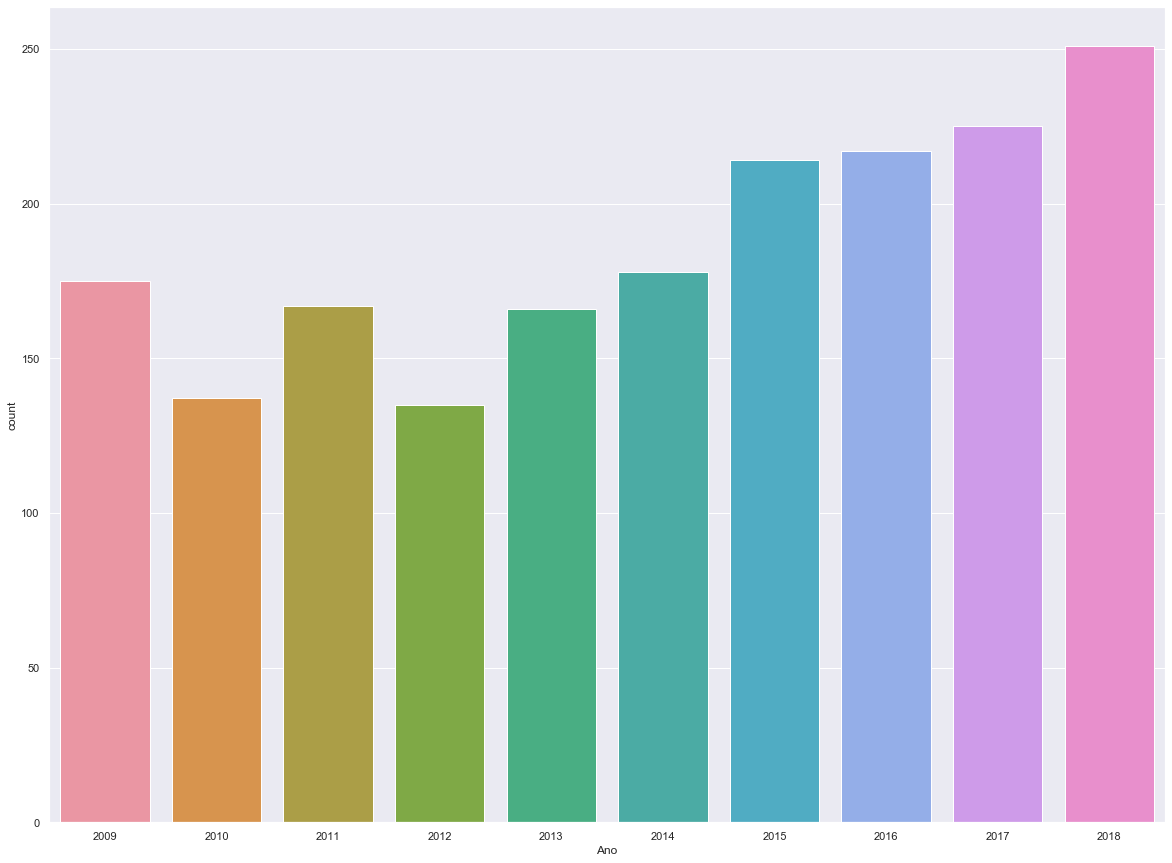

In [32]:
plt.figure(figsize=(20,15))
sns.set(style="darkgrid", palette='Set2')
ax = sns.countplot(df_brasileiro['Ano'], data=df_brasileiro)

### Analisando o Publico

In [33]:
df_lancamento.nlargest(10, 'Público no ano de exibição')

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição,Ano
5848,2018,"""Vingadores: Guerra Infinita""",E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280.0,2.380202e+08,2018
6151,2018,"""Nada A Perder""",B1800110100000,Ficção,Brasil,Brasileira,2018-03-29,Downtown/Paris,Distribuição Nacional,12184373.0,1.209928e+08,2018
4793,2016,"""Os Dez Mandamentos - O Filme""",B1600036400000,Ficção,Brasil,Brasileira,2016-01-28,Downtown/Paris,Distribuição Nacional,11305479.0,1.168330e+08,2016
1051,2010,"""Tropa de elite 2""",B1001296000000,Ficção,Brasil,Brasileira,2010-08-10,Zazen,Distribuição Nacional,11023475.0,1.023201e+08,2010
2047,2012,"""Os Vingadores - The Avengers""",E1500275200000,Ficção,Estados Unidos,Estrangeira,2012-04-27,Disney,Distribuição Internacional,10911371.0,1.295956e+08,2012
4206,2015,"""Vingadores: A Era de Ultron""",E1500563200000,Ficção,Estados Unidos,Estrangeira,2015-04-23,Disney,Distribuição Internacional,10129071.0,1.461849e+08,2015
4199,2015,"""Velozes e Furiosos 7""",E1500161300000,Ficção,Estados Unidos,Estrangeira,2015-02-04,Universal,Distribuição Internacional,9857946.0,1.424659e+08,2015
5840,2018,"""Os Incríveis 2""",E1800037700000,Animação,Estados Unidos,Estrangeira,2018-06-28,Disney,Distribuição Internacional,9809291.0,1.450118e+08,2018
4411,2016,"""Capitão América: Guerra civil""",E1600129800000,Ficção,Estados Unidos,Estrangeira,2016-04-28,Disney,Distribuição Internacional,9617572.0,1.433370e+08,2016
1713,2012,"""A saga Crepúsculo: Amanhecer  Parte 2 O final""",E1500545000000,Ficção,Estados Unidos,Estrangeira,2012-11-15,Paris,Distribuição Nacional,9453533.0,9.948825e+07,2012
